In [ ]:
# 1)above 200 ema -- Complete
# 2)1 year Return more than nifty 500 --Complete
# 3) Last 3 quarter increasing PAT
# 4)Increasing ROCE
# 5) PE < SECTOR PE
# 6) Stock price is around  52 week high(Threshold can be 15%)
# 7)Price should be above super trend indicator
# 8) Last week volume adjusted price
# 9) Rounding bottom with increase volume
# 10)Stock which ends with 50 day ema but above 100 day ema --1st Priority --Complete
# 11) Stock whose weekly RSI is above 60 are called momentum stocks

In [ ]:
# Importing all the libraries
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd
import numpy as np
import yfinance as yf
#from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from datetime import date, timedelta

In [ ]:
# Connecting with the spreadsheet available in my gdrive
def connect_with_google_sheet(spread_sheet_name,sheet_name):
  auth.authenticate_user()
  creds, _ = default()
  gc = gspread.authorize(creds)
  sheet = gc.open(spread_sheet_name)
  worksheet = sheet.worksheet(sheet_name)
  df = pd.DataFrame(worksheet.get_all_values())
  df.columns = df.iloc[0]
  df.drop(0,inplace=True)
  df['STOCK_NAME']=df['SCRIP CODE'].apply(lambda x:x.replace("NSE:",""))
  list_of_stocks=set(df['STOCK_NAME'])
  return list_of_stocks


In [ ]:
#Getting the list of stocks
list_of_stocks=connect_with_google_sheet("share_list","Sheet2")


In [ ]:
def get_stock_data(list_of_stocks):
  res=pd.DataFrame()
  today = date.today()
  one_year_ago = today - timedelta(weeks=52)
  list_of_stocks_data_not_found=[]
  for i in list_of_stocks:
    try:
      stock_data = yf.download(i+'.NS', start=one_year_ago, end=today)
      stock_data['STOCK_NAME']=i
    except:
      list_of_stocks_data_not_found.append(i)
    try:
      stock_data['50_day_ema'] = stock_data['Adj Close'].ewm(span=50, adjust=False).mean()
      stock_data['100_day_ema'] = stock_data['Adj Close'].ewm(span=100, adjust=False).mean()
      stock_data['200_day_ema'] = stock_data['Adj Close'].ewm(span=200, adjust=False).mean()
      stock_data['52_week_high']=stock_data['Adj Close'].max()
      stock_data['52_week_low']=stock_data['Adj Close'].min()

      res=pd.concat([res,stock_data])
    except:
      list_of_stocks_data_not_found.append(i)
  return res,list_of_stocks_data_not_found

In [ ]:
#Callin the function of get_stock_data
res,list_of_stocks_data_not_found=get_stock_data(list_of_stocks)


[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['.NS']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  4 of 4 completed
ERROR:yfinance:
4 Failed downloads:
ERROR:yfinance:['BHARATI', 'INFRASTRUTURE.NS', 'DEFENCE', 'AND']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[************

$ASIANELEC.NS: possibly delisted; No price data found  (1d 2023-06-30 -> 2024-06-28)



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  2 of 2 completed
ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['TRIBUTE', 'TRADING.NS']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100

In [ ]:
res

,Open,High,Low,Close,Adj Close,Volume,STOCK_NAME,50_day_ema,100_day_ema,200_day_ema,52_week_high,52_week_low
Date,,,,,,,,,,,,
2023-06-30,4636.000000,4735.000000,4635.000000,4691.549805,4653.727539,587936.0,BAJAJ-AUTO,4653.727539,4653.727539,4653.727539,9961.750000,4547.094238
2023-07-03,4685.200195,4688.000000,4588.049805,4610.649902,4573.479980,457367.0,BAJAJ-AUTO,4650.580576,4652.138478,4652.929056,9961.750000,4547.094238
2023-07-04,4611.950195,4674.799805,4611.950195,4625.399902,4588.110840,286373.0,BAJAJ-AUTO,4648.130782,4650.870604,4652.284099,9961.750000,4547.094238
2023-07-05,4647.950195,4900.000000,4633.000000,4890.049805,4850.627441,891033.0,BAJAJ-AUTO,4656.071828,4654.826185,4654.257664,9961.750000,4547.094238
2023-07-06,4890.000000,4938.000000,4832.000000,4917.700195,4878.054688,888595.0,BAJAJ-AUTO,4664.777038,4659.246552,4656.484500,9961.750000,4547.094238
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-21,21.000000,21.000000,20.400000,20.900000,20.900000,36879.0,IL&FSENGG,26.733274,29.317942,27.860080,50.650002,10.450000
2024-06-24,21.000000,21.500000,19.850000,20.070000,20.070000,40773.0,IL&FSENGG,26.471970,29.134815,27.782567,50.650002,10.450000
2024-06-25,20.330000,20.850000,20.049999,20.360001,20.360001,89053.0,IL&FSENGG,26.232285,28.961056,27.708711,50.650002,10.450000


In [ ]:
res.index.max()

Timestamp('2024-06-27 00:00:00')

In [ ]:
Second_last_day_stock=res.groupby(by='STOCK_NAME').apply(lambda x: x.iloc[-2]).reset_index(drop=True)

In [ ]:

Second_last_day_stock

,Open,High,Low,Close,Adj Close,Volume,STOCK_NAME,50_day_ema,100_day_ema,200_day_ema,52_week_high,52_week_low
0,36.599998,37.500000,36.279999,36.439999,36.439999,729363.0,3IINFOLTD,38.173657,40.401244,40.947293,61.549999,31.900000
1,8426.000000,8435.000000,8235.700195,8390.849609,8390.849609,336425.0,ABB,7723.439116,6895.410547,6009.872861,9020.000000,3916.501221
2,1734.250000,1734.250000,1701.000000,1703.849976,1703.849976,9040.0,ACCELYA,1701.670482,1689.465950,1622.250435,2057.000000,1244.173218
3,2129.899902,2139.550049,2058.050049,2081.699951,2081.699951,55147.0,ALKYLAMINE,2014.959948,2067.084705,2178.443608,2709.333008,1805.342651
4,6279.799805,6285.649902,6125.000000,6136.799805,6136.799805,538411.0,APOLLOHOSP,6082.176596,6033.535655,5837.096000,6774.049805,4756.009277
...,...,...,...,...,...,...,...,...,...,...,...,...
88,23.150000,23.320000,22.620001,22.910000,22.910000,5173662.0,VAKRANGEE,23.771107,23.276370,21.810912,30.500000,14.602741
89,436.649994,446.850006,426.049988,442.100006,442.100006,162210828.0,VEDL,416.391202,369.295102,322.038885,480.257874,194.947830
90,65.000000,65.900002,63.509998,63.689999,63.689999,107015.0,VLEGOV,62.323509,60.446201,54.247676,80.250000,29.150000
91,496.850006,499.899994,493.799988,495.200012,495.200012,6406045.0,WIPRO,472.985626,469.696211,455.696060,543.000000,377.445038


In [ ]:
def get_indices_data_last_52_week(indice_symbol):
  today = date.today()
  one_year_ago = today - timedelta(weeks=52)
  stock_data = yf.download(indice_symbol, start=one_year_ago, end=today)
  return stock_data

In [ ]:
Second_last_day_stock.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'STOCK_NAME',
       '50_day_ema', '100_day_ema', '200_day_ema', '52_week_high',
       '52_week_low'],
      dtype='object')

In [ ]:
res.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'STOCK_NAME',
       '50_day_ema', '100_day_ema', '200_day_ema', '52_week_high',
       '52_week_low'],
      dtype='object')

In [ ]:
def creation_of_flags(res):
  Last_day_stock=res.groupby(by='STOCK_NAME').apply(lambda x: x.iloc[-1]).reset_index(drop=True)
  Second_last_day_stock=res.groupby(by='STOCK_NAME').apply(lambda x: x.iloc[-2]).reset_index(drop=True)
  temp=res.groupby(by='STOCK_NAME').apply(lambda x:(x['Adj Close'].iloc[-1]-x['Adj Close'].iloc[0])/(x['Adj Close'].iloc[0])).reset_index().rename(columns={0: '52_Weeks_Percentage_Change'})
  result=Last_day_stock.merge(temp,on='STOCK_NAME')
  nifty500_data=get_indices_data_last_52_week("^CRSLDX")
  nifty_500_52_week_change=(nifty500_data['Adj Close'].iloc[-1]-nifty500_data['Adj Close'].iloc[0])/nifty500_data['Adj Close'].iloc[0]
  Second_last_day_stock=Second_last_day_stock[['STOCK_NAME','Adj Close','Volume','50_day_ema', '100_day_ema', '200_day_ema']]
  Second_last_day_stock.columns=['STOCK_NAME', 'Last_Day_Adj Close', 'Last_Day_Volume', 'Last_Day_50_day_ema', 'Last_Day_100_day_ema', 'Last_Day_200_day_ema']
  result=result.merge(Second_last_day_stock,on='STOCK_NAME')
  result['Nifty_500_52_week_change']=nifty_500_52_week_change
  result['nifty_500_score']=result.apply(lambda x: 1 if x['52_Weeks_Percentage_Change']>x['Nifty_500_52_week_change'] else 0,axis=1)
  result['200_day_ema_score']=result.apply(lambda x :1 if x['Adj Close']> x['200_day_ema'] else 0,axis=1)
  result['100_day_ema_score']=result.apply(lambda x :1 if x['Adj Close']> x['100_day_ema'] else 0,axis=1)
  result['50_day_ema_score']=result.apply(lambda x :1 if x['Adj Close']> x['50_day_ema'] else 0,axis=1)
  result['50_day_ema_trigger']=result.apply(lambda x :1 if (x['Adj Close'] < x['50_day_ema']) and (x['Last_Day_Adj Close'] > x['Last_Day_50_day_ema']) else 0,axis=1)
  result['Near_52_Week_High']=result.apply(lambda x:1 if x['Adj Close'] > 0.85*x['52_week_high'] else 0 ,axis=1)
  #result['Near_52_Week_Low']=result.apply(lambda x:1 if x['Adj Close'] < 0.15*x['52_week_low'] else 0 ,axis=1)
  result['Volume_Increase']=result.apply(lambda x:1 if x['Volume'] > x['Last_Day_Volume'] else 0 ,axis=1)

  return result




In [ ]:
result=creation_of_flags(res)



[*********************100%%**********************]  1 of 1 completed


In [ ]:
result[result['50_day_ema_trigger']==1]

,Open,High,Low,Close,Adj Close,Volume,STOCK_NAME,50_day_ema,100_day_ema,200_day_ema,...,Last_Day_100_day_ema,Last_Day_200_day_ema,Nifty_500_52_week_change,nifty_500_score,200_day_ema_score,100_day_ema_score,50_day_ema_score,50_day_ema_trigger,Near_52_Week_High,Volume_Increase
2,1703.849976,1724.949951,1671.00,1686.300049,1686.300049,15662.0,ACCELYA,1701.067720,1689.403259,1622.887745,...,1689.46595,1622.250435,0.371722,0,1,0,0,1,0,1
92,23.870001,23.930000,23.32,23.510000,23.510000,103940384.0,YESBANK,23.669898,23.479575,22.240005,...,23.47896,22.227241,0.371722,1,1,1,0,1,0,0


In [ ]:
result.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'STOCK_NAME',
       '50_day_ema', '100_day_ema', '200_day_ema', '52_week_high',
       '52_week_low', '52_Weeks_Percentage_Change', 'Last_Day_Adj Close',
       'Last_Day_Volume', 'Last_Day_50_day_ema', 'Last_Day_100_day_ema',
       'Last_Day_200_day_ema', 'Nifty_500_52_week_change', 'nifty_500_score',
       '200_day_ema_score', '100_day_ema_score', '50_day_ema_score',
       '50_day_ema_trigger', 'Near_52_Week_High', 'Volume_Increase'],
      dtype='object')

In [ ]:
result[(result['Near_52_Week_High']==1) & (result['Volume_Increase']==1) & (result['nifty_500_score']==1) & (result['200_day_ema_score']==1) & (result['100_day_ema_score']==1) & (result['Adj Close'] > result['Last_Day_Adj Close'])]

,Open,High,Low,Close,Adj Close,Volume,STOCK_NAME,50_day_ema,100_day_ema,200_day_ema,...,Last_Day_100_day_ema,Last_Day_200_day_ema,Nifty_500_52_week_change,nifty_500_score,200_day_ema_score,100_day_ema_score,50_day_ema_score,50_day_ema_trigger,Near_52_Week_High,Volume_Increase
1,8380.500000,8690.849609,8327.549805,8643.049805,8643.049805,654170.0,ABB,7759.502280,6930.017265,6036.073626,...,6895.410547,6009.872861,0.371722,1,1,1,1,0,1,1
6,240.190002,242.690002,238.330002,242.160004,242.160004,6615344.0,ASHOKLEY,215.250686,199.293736,186.076839,...,198.427751,185.513190,0.371722,1,1,1,1,0,1,1
15,34300.000000,36678.000000,33980.000000,34749.648438,34749.648438,107957.0,BOSCHLTD,31127.036681,29296.915882,26425.105160,...,29186.759669,26341.441409,0.371722,1,1,1,1,0,1,1
25,214.500000,218.460007,213.449997,217.949997,217.949997,24218669.0,GAIL,204.919737,191.944844,170.509759,...,191.419487,170.032972,0.371722,1,1,1,1,0,1,1
37,18.250000,18.700001,18.000000,18.520000,18.520000,449366808.0,IDEA,15.201172,14.489164,13.338997,...,14.407733,13.286927,0.371722,1,1,1,1,0,1,1
41,6.910000,6.910000,6.910000,6.910000,6.910000,76961.0,IL&FSTRANS,4.828653,4.758593,4.561988,...,4.715130,4.538390,0.371722,1,1,1,1,0,1,1
42,932.090027,942.000000,930.090027,939.000000,939.000000,36763.0,INFRABEES,898.384233,863.191063,801.108029,...,861.659569,799.722180,0.371722,1,1,1,1,0,1,1
45,737.349976,751.700012,729.799988,749.250000,749.250000,254689.0,JUBLPHARMA,697.535483,650.560268,582.751596,...,648.566536,581.078245,0.371722,1,1,1,1,0,1,1
54,2842.000000,2905.000000,2793.050049,2888.949951,2888.949951,6900180.0,M&M,2534.484428,2272.512378,2007.469299,...,2260.059094,1998.610197,0.371722,1,1,1,1,0,1,1
55,2699.899902,2754.949951,2688.000000,2705.750000,2705.750000,79258.0,MASTEK,2622.020339,2618.906931,2534.780679,...,2617.152526,2533.062395,0.371722,1,1,1,1,0,1,1


In [ ]:
result.to_excel('Share_data_27_06_2024.xlsx')

In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
import pandas as pd

In [ ]:
result=pd.read_excel('Share_data_25_06_2024.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: 'Share_data_25_06_2024.xlsx'

In [ ]:
result[result['50_day_ema_trigger']==1]

,Open,High,Low,Close,Adj Close,Volume,STOCK_NAME,50_day_ema,100_day_ema,200_day_ema,...,Last_Day_100_day_ema,Last_Day_200_day_ema,Nifty_500_52_week_change,nifty_500_score,200_day_ema_score,100_day_ema_score,50_day_ema_score,50_day_ema_trigger,Near_52_Week_High,Volume_Increase
7,362.149994,362.500000,351.149994,354.700012,354.700012,3926043.0,ASTERDM,355.727751,345.438485,320.518396,...,345.251383,320.174863,0.374355,1,1,1,0,1,1,0
38,86.400002,86.589996,84.809998,84.949997,84.949997,4203406.0,IDBI,85.594358,83.249002,77.410025,...,83.214638,77.334247,0.374355,1,1,1,0,1,1,0
87,436.000000,437.950012,429.399994,430.750000,430.750000,7140628.0,TATAPOWER,431.172448,407.516752,363.688627,...,407.047394,363.014643,0.374355,1,1,1,0,1,1,0


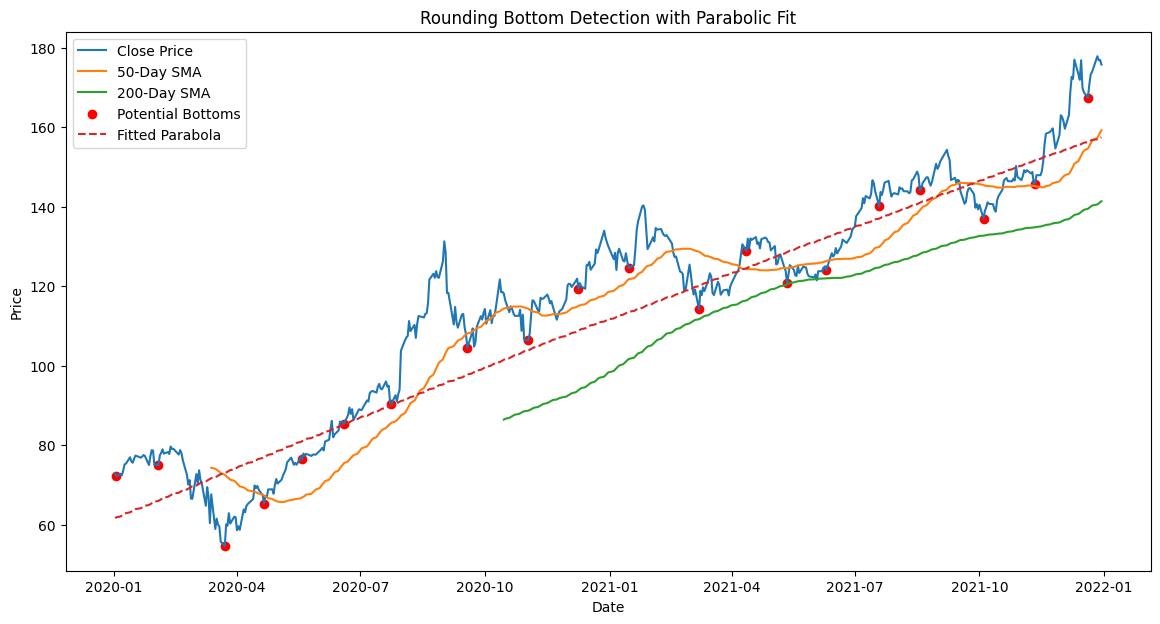

                                Close
Date                                 
2020-01-03 00:00:00-05:00   72.251114
2020-02-03 00:00:00-05:00   74.979118
2020-03-23 00:00:00-04:00   54.632900
2020-04-21 00:00:00-04:00   65.346657
2020-05-19 00:00:00-04:00   76.454315
2020-06-19 00:00:00-04:00   85.385452
2020-07-24 00:00:00-04:00   90.449211
2020-09-18 00:00:00-04:00  104.529678
2020-11-02 00:00:00-05:00  106.417961
2020-12-09 00:00:00-05:00  119.352180
2021-01-15 00:00:00-05:00  124.605324
2021-03-08 00:00:00-05:00  114.210648
2021-04-12 00:00:00-04:00  128.815796
2021-05-12 00:00:00-04:00  120.706940
2021-06-10 00:00:00-04:00  123.990799
2021-07-19 00:00:00-04:00  140.056213
2021-08-18 00:00:00-04:00  144.116135
2021-10-04 00:00:00-04:00  137.006821
2021-11-11 00:00:00-05:00  145.815460
2021-12-20 00:00:00-05:00  167.391495
Parabola parameters: [-3.17624424e-05  2.06357146e-01  6.17074612e+01]


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.optimize import curve_fit

# Download historical stock data for Apple (AAPL)
stock = yf.Ticker('AAPL')
df = stock.history(start='2020-01-01', end='2021-12-31')  # Adjust the date range as needed

# Smoothing the data using a moving average
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['SMA_200'] = df['Close'].rolling(window=200).mean()

# Find potential bottoms using scipy's find_peaks function
# Inverting the Close prices to find valleys (bottoms)
inverted_close = df['Close'].max() - df['Close']
peaks, _ = find_peaks(inverted_close, distance=20)

# Fit a parabolic curve to the identified potential bottom points
def parabola(x, a, b, c):
    return a * x**2 + b * x + c

# Get the x (time) and y (price) values for the potential bottoms
x_data = np.arange(len(df))[peaks]
y_data = df['Close'].values[peaks]

# Fit the parabola
params, covariance = curve_fit(parabola, x_data, y_data)

# Calculate the fitted parabolic curve
df['Parabola'] = parabola(np.arange(len(df)), *params)

# Plotting the data
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['SMA_50'], label='50-Day SMA')
plt.plot(df['SMA_200'], label='200-Day SMA')
plt.scatter(df.iloc[peaks].index, df.iloc[peaks]['Close'], color='red', label='Potential Bottoms')
plt.plot(df['Parabola'], label='Fitted Parabola', linestyle='--')
plt.title('Rounding Bottom Detection with Parabolic Fit')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Print potential bottom dates and prices
print(df.iloc[peaks][['Close']])
print("Parabola parameters:", params)

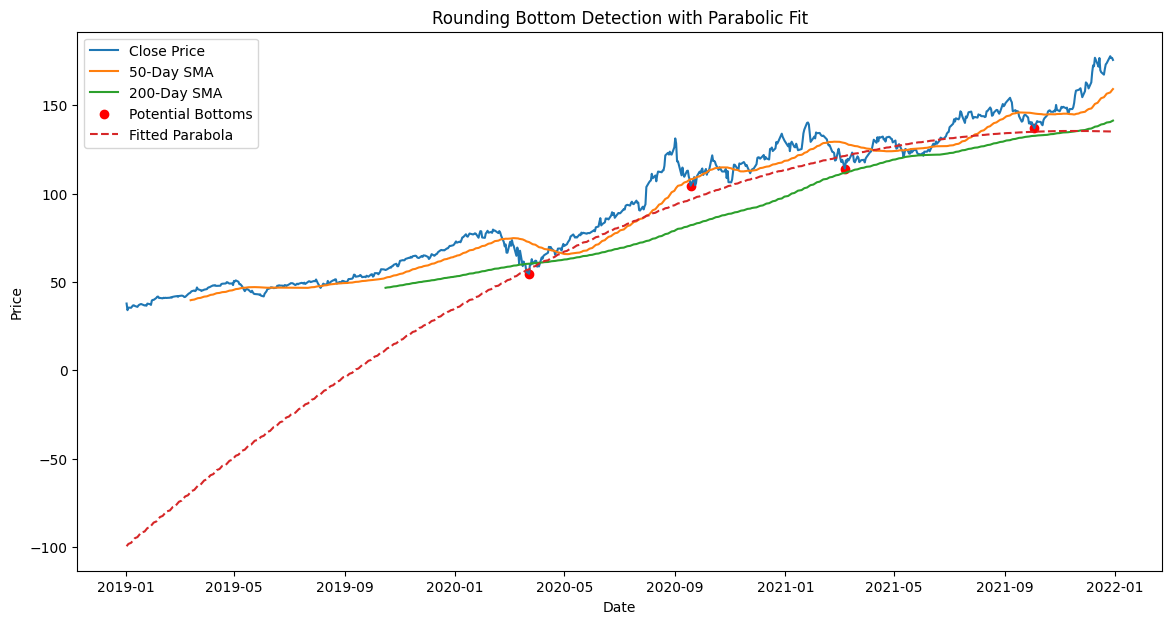

                                Close
Date                                 
2020-03-23 00:00:00-04:00   54.632893
2020-09-18 00:00:00-04:00  104.529678
2021-03-08 00:00:00-05:00  114.210648
2021-10-04 00:00:00-04:00  137.006790
Parabola parameters: [-4.45571709e-04  6.47363081e-01 -9.96217125e+01]


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.optimize import curve_fit

# Download historical stock data for Apple (AAPL)
stock = yf.Ticker('AAPL')
df = stock.history(start='2019-01-01', end='2021-12-31')  # Adjust the date range as needed

# Smoothing the data using a moving average
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['SMA_200'] = df['Close'].rolling(window=200).mean()

# Find potential bottoms using scipy's find_peaks function
# Inverting the Close prices to find valleys (bottoms)
inverted_close = df['Close'].max() - df['Close']
peaks, _ = find_peaks(inverted_close, distance=50, prominence=10)

# Function to fit a parabolic curve
def parabola(x, a, b, c):
    return a * x**2 + b * x + c

# Get the x (time) and y (price) values for the potential bottoms
x_data = np.arange(len(df))[peaks]
y_data = df['Close'].values[peaks]

# Fit the parabola
params, covariance = curve_fit(parabola, x_data, y_data)

# Calculate the fitted parabolic curve
df['Parabola'] = parabola(np.arange(len(df)), *params)

# Plotting the data
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['SMA_50'], label='50-Day SMA')
plt.plot(df['SMA_200'], label='200-Day SMA')
plt.scatter(df.iloc[peaks].index, df.iloc[peaks]['Close'], color='red', label='Potential Bottoms')
plt.plot(df['Parabola'], label='Fitted Parabola', linestyle='--')
plt.title('Rounding Bottom Detection with Parabolic Fit')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Print potential bottom dates and prices
print(df.iloc[peaks][['Close']])
print("Parabola parameters:", params)
